# Projeto 3 - Análise de sentimento sobre o mercado financeiro

###Entrega
O projeto deve ser entregue até a terça-feira da 4ª semana de aula, envie o link do GitHub ou HTML na atividade no Moodle.

O prazo máximo é quarta-feira da 4ª semana de aula, valendo 20% a menos da nota.

###Dados do Certificado
 - Linguagem: Python
 - Tecnologias: Pandas, Numpy, Spacy, Matplotlib e Sklearn
 - Carga horária: 20 horas

##Financial Sentiment Analysis
Este conjunto de dados reúne diversos textos sobre o mercado financeiro e categoriza cada texto em positivo, negativo e neutro

#Sobre este projeto
Os principais pontos que serão avaliados:
 - Extração de dados
 - Manipulação de dados e criação de gráficos simples com o Pandas
 - Criar um modelo de predição
 - Apresentação dos resultados

#Preparação do ambiente
 - Para este projeto, acessem o link do dataset e logo abaixo cliquem em "Download". Caso você não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download. Descompacte o arquivo.
 - Este conjunto de dados está em inglês, use o Spacy e os demais dados auxiliares em inglês.
 - Caso demore demais para executar ou que ocorra estouro de memória, use somente 40% dos dados.

In [1]:
import numpy as np
import pandas as pd

import spacy

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from google.colab import drive

In [2]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Financial Sentiment Analysis.csv')

df.head()

Mounted at /content/drive


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [3]:
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.0 MB 18.9 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [4]:
nlp = spacy.load("en_core_web_sm")


## Exercicio 01

Construa as funções e a pipeline, separe os dados em treino e teste, execute a pipeline para classificar em positivo, negativo e neutro. Quais foram os valores de acurácia, precisão e sensitividade deste modelo? (3.0 pontos)

In [5]:
# classe para gerenciar X e y
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}

# Esta funcao remove espacos em branco no inicio e
# no fim do texto e converte todo o texto em letras
# minusculas
def clean_text(texto):     
    return texto.strip().lower()

# Esta funcao remove todas as stopwords e pontuacoes
def tokenizer(texto):
    doc = nlp(texto)
    tokens = [token for token in doc if ((not token.is_stop) & (not token.is_punct))]
    tokens = [token.lemma_.lower().strip() for token in tokens]
    return tokens

# Criamos um objeto CountVectorizer para vetorizar cada
# texto
vectorizer = CountVectorizer(tokenizer = tokenizer, ngram_range=(1,1)) 

# Criamos um modelo SVM
classifier = SVC()

In [6]:
# Separando em X e y
X = df.Sentence
y = df.Sentiment

# Separando em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Construindo uma pipeline
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer),
                 ('classifier', classifier)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(round(accuracy_score(y_test, y_pred), 3))
print(round(precision_score(y_test, y_pred, average='macro'), 3))
print(round(recall_score(y_test, y_pred, average='macro'), 3))

0.673
0.569
0.511


##Exercicio 02
Use o seu modelo para classificar os seguintes textos extraídos do site Financial Times. Faça uma tabela com o valor esperado e o valor obtido, e responda: houve divergência entre o esperado e o obtido? O que poderia ser feito para corrigir? (1.0 ponto)
 -  Central banks’ rate rises, geopolitical risk and slowing growth trigger investors’ stampede for safety. resultado esperado: [negativo]
 - China opens up bond market in bid to woo foreign investors. resultado esperado: [neutro]
 - HM Revenue & Customs says residents had £850bn in accounts overseas but it does not estimate if tax paid on this. resultado esperado: [negativo]
 - Japan’s horrifying crop of data falsification is also encouraging. The scandals have emerged from a distinct new phase in the evolution of the country’s shareholder capitalism. resultado esperado: [negativo]
 - Despite internal problems, the group continues to exert a tight grip on the US’s gun control debate. resultado esperado: [neutro]

In [7]:
df2 = {'Sentence':['Central banks’ rate rises, geopolitical risk and slowing growth trigger investors’ stampede for safety.',
                   'China opens up bond market in bid to woo foreign investors.',
                   'HM Revenue & Customs says residents had £850bn in accounts overseas but it does not estimate if tax paid on this.',
                   'Japan’s horrifying crop of data falsification is also encouraging. The scandals have emerged from a distinct new phase in the evolution of the country’s shareholder capitalism.',
                   'Despite internal problems, the group continues to exert a tight grip on the US’s gun control debate.'],
      'Sentiment':['negative','neutral','negative','negative','neutral']}

df2 = pd.DataFrame(df2)
df2

,Sentence,Sentiment
0,"Central banks’ rate rises, geopolitical risk a...",negative
1,China opens up bond market in bid to woo forei...,neutral
2,HM Revenue & Customs says residents had £850bn...,negative
3,Japan’s horrifying crop of data falsification ...,negative
4,"Despite internal problems, the group continues...",neutral


In [8]:
X2 = df2.Sentence
y2 = df2.Sentiment

y2_pred = pipe.predict(X2)

print(round(accuracy_score(y2, y2_pred), 3))
print(round(precision_score(y2, y2_pred, average='macro'), 3))
print(round(recall_score(y2, y2_pred, average='macro'), 3))

0.4
0.167
0.333


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
resultado = {'Esperado':y2, 'Obtido':y2_pred}
resultado = pd.DataFrame(resultado)
resultado

,Esperado,Obtido
0,negative,positive
1,neutral,neutral
2,negative,neutral
3,negative,neutral
4,neutral,neutral


In [10]:
df.Sentiment.value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [11]:
y_train.value_counts()

neutral     2168
positive    1305
negative     616
Name: Sentiment, dtype: int64

Houve uma divergencia de 60% dos valores obtidos com relação ao esperado, nota-se que a base de dados que foi utilizada para criação do modelo esta desbalanceada contendo muitas sentenças neutras e positivas com relação as negativas, isso induziu o treino do modelo a 'chutes' em sua maioria de neutro,uma forma de melhoria seria balanceando os dados.

##Exercicio 03
Faça uma análise exploratória, onde identifique as três empresas mais citadas e quantifique os níveis de positividade, negatividade e neutralidade dos textos sobre estas empresas. (3.0 pontos)

###A) Extraia de todos os textos as entidades, há quantas entidades? (0.6 pontos)

In [12]:
# Filtrando as entidades e adicionando a uma lista
entidades = []
for linhas in df.Sentence:
  doc = nlp(linhas)
  for ent in doc.ents:
    entidades.append(ent.text)

In [13]:
# Convertendo a lista de entidades em um conjunto para remover dados repetidos
entidades = set(entidades)
print(len(entidades))

7488


Após extração das entidades de todo o texto e removido as apareições repetidas das entidades, findou em um total de 7488 entidades distintas.

###B) Quantas entidades são empresas?

In [14]:
empresas = []
for linhas in df.Sentence:
  doc = nlp(linhas)
  for ent in doc.ents:
    if ent.label_ == 'ORG':
      empresas.append(ent.text)

In [15]:
empresas_distintas = set(empresas)
print(len(empresas_distintas))

2236


O total de empresas distintas é de 2236.

###C) Quais são as três empresas mais citadas?

In [16]:
pd.set_option('display.max_rows', None)
empresas = pd.DataFrame(empresas)
empresas.columns = ['Empresas']
empresas.Empresas.value_counts(ascending=False)

EUR                                                                                                                                     568
HEL                                                                                                                                      62
EPS                                                                                                                                      55
Nokia                                                                                                                                    50
pct                                                                                                                                      39
Group                                                                                                                                    36
Finnair                                                                                                                                  29
ADP News            

Acima esta a relação de todas as empresas, definidas pelo modelo, em ordem decrente ao número de citações no texto. No topo com maior número de aparições e rotuladas como ORG:
 - EUR
 - HEL
 - EPS

###D) Faça uma tabela onde demonstre as três empresas mais citadas e o total de textos positivos, negativos e neutros de cada uma.

In [17]:
empresas_eur_sentence = []
empresas_eur_sentiment = []
empresas_hel_sentence = []
empresas_hel_sentiment = []
empresas_eps_sentence = []
empresas_eps_sentiment = []
for linha,valor in enumerate(df.Sentence):
  doc = nlp(valor)
  for ent in doc.ents:
    if (ent.label_ == 'ORG') and (ent.text == 'EUR'):
      empresas_eur_sentence.append(df.iloc[linha]['Sentence'])
      empresas_eur_sentiment.append(df.iloc[linha]['Sentiment'])
    if (ent.label_ == 'ORG') and (ent.text == 'HEL'):
      empresas_hel_sentence.append(df.iloc[linha]['Sentence'])
      empresas_hel_sentiment.append(df.iloc[linha]['Sentiment'])
    if (ent.label_ == 'ORG') and (ent.text == 'EPS'):
      empresas_eps_sentence.append(df.iloc[linha]['Sentence'])
      empresas_eps_sentiment.append(df.iloc[linha]['Sentiment'])
    

In [18]:
empresas_eur_citadas = {'Sentence':empresas_eur_sentence,'Sentiment':empresas_eur_sentiment}
empresas_eur_citadas = pd.DataFrame(empresas_eur_citadas)

empresas_hel_citadas = {'Sentence':empresas_hel_sentence,'Sentiment':empresas_hel_sentiment}
empresas_hel_citadas = pd.DataFrame(empresas_hel_citadas)

empresas_eps_citadas = {'Sentence':empresas_eps_sentence,'Sentiment':empresas_eps_sentiment}
empresas_eps_citadas = pd.DataFrame(empresas_eps_citadas)

In [19]:
cont_eur = empresas_eur_citadas.Sentiment.value_counts()
cont_hel = empresas_hel_citadas.Sentiment.value_counts()
cont_eps = empresas_eps_citadas.Sentiment.value_counts()

In [20]:
cont_eur

neutral     242
positive    183
negative    143
Name: Sentiment, dtype: int64

In [21]:
cont_hel

neutral     29
positive    23
negative    10
Name: Sentiment, dtype: int64

In [22]:
cont_eps

positive    25
neutral     17
negative    13
Name: Sentiment, dtype: int64

In [23]:
df3 = {'Positivo':[cont_eur[1],cont_hel[1],cont_eps[0]], 'Neutro':[cont_eur[0],cont_hel[0],cont_eps[1]], 'Negativo':[cont_eur[2],cont_hel[2],cont_eps[2]]}
df3 = pd.DataFrame(df3)
df3.index = ['EUR','HEL','EPS']

In [24]:
df3

,Positivo,Neutro,Negativo
EUR,183,242,143
HEL,23,29,10
EPS,25,17,13


##Exercicio 04

Faça gráficos a partir da tabela obtida acima. Descreva cada gráfico de forma que estivesse apresentando à diretoria dessas três empresas. (3.0 pontos)

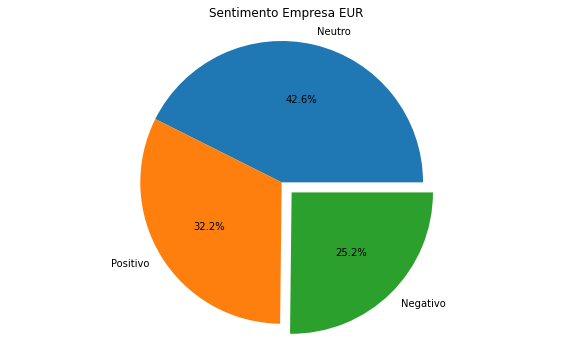

In [25]:
from matplotlib import figure
import matplotlib.pyplot as plt

plt.figure(figsize=[10,6])
plt.pie(cont_eur, labels=['Neutro','Positivo','Negativo'], autopct='%1.1f%%', explode=(0,0,0.1))
plt.title("Sentimento Empresa EUR")
plt.axis('equal')
plt.show()


O gráfico acima representa o percentual de citações a empresa EUR e seus respectivos sentimentos, vale destacar que 25% foram sentenças negativas competindo 32% de positivas.

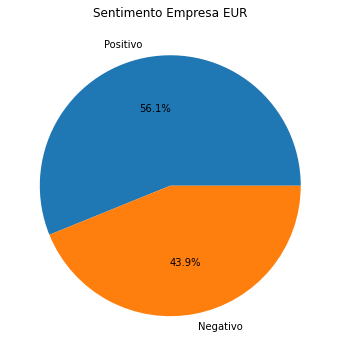

In [33]:
plt.figure(figsize=[10,6])
plt.pie(cont_eur[[1,2]], labels=['Positivo','Negativo'],autopct='%1.1f%%')
plt.title("Sentimento Empresa EUR")
plt.show()

Ao analisar apenas as sentenças positivas e negativas sem interferencia das negativas mostra que os sentimentos estão nivelados com relação a EUR.

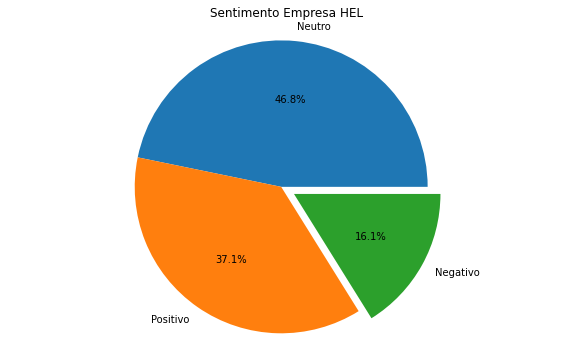

In [26]:
plt.figure(figsize=[10,6])
plt.pie(cont_hel, labels=['Neutro','Positivo','Negativo'], autopct='%1.1f%%',explode=(0,0,0.1))
plt.title("Sentimento Empresa HEL")
plt.axis('equal')
plt.show()

O gráfico acima representa o percentual de citações a empresa HEL e seus respectivos sentimentos, vale destacar que 16% foram sentenças negativas competindo 37% de positivas.

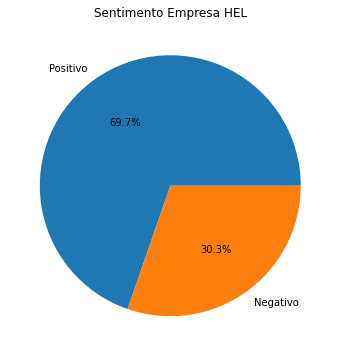

In [35]:
plt.figure(figsize=[10,6])
plt.pie(cont_hel[[1,2]], labels=['Positivo','Negativo'],autopct='%1.1f%%')
plt.title("Sentimento Empresa HEL")
plt.show()

Ao observar apenas o publico que opnaram positiva ou negativamente sobre a HEL, pode-se observar que existe uma tendencia a aceitação da empresa.

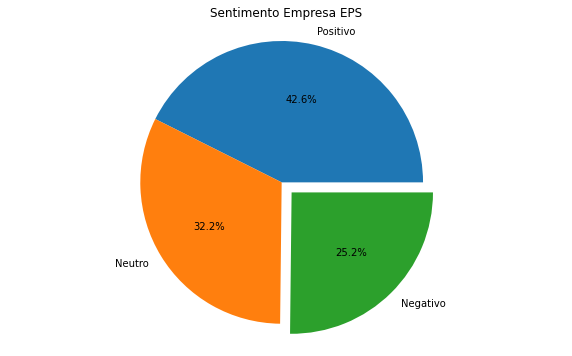

In [27]:
plt.figure(figsize=[10,6])
plt.pie(cont_eur, labels=['Positivo','Neutro','Negativo'], autopct='%1.1f%%',explode=(0,0,0.1))
plt.title("Sentimento Empresa EPS")
plt.axis('equal')
plt.show()

O gráfico acima representa o percentual de citações a empresa EPS e seus respectivos sentimentos, como a empresa EUR, vale destacar que 25% foram sentenças negativas competindo 32% de positivas.

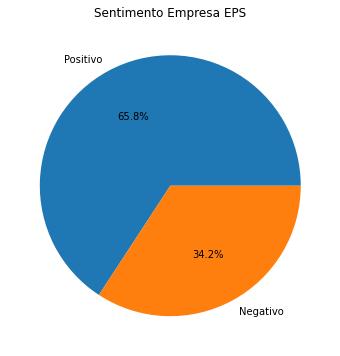

In [36]:
plt.figure(figsize=[10,6])
plt.pie(cont_eps[[0,2]], labels=['Positivo','Negativo'],autopct='%1.1f%%')
plt.title("Sentimento Empresa EPS")
plt.show()

Porem ao observar os sentimentos positivos e negativos em separado, verifica-se uma tendencia a boa aceitação da marca.

##Conclusão

Os gráficos mostram o sentimento das citações com relação as empresas, e levando em consideração apenas o publico que opnaram positiva e negativamente todas as empresas tiveram avaliações positivas ultrapasando os 50% de positividade. Porem vale destacar que a um publico muito grande que ainda não tem uma ideia formada sobre as marcas.

Faz-se necessário trabalhar o publico da neutralidade para que tenha ideias favoraveis a empresa, ações devem ser criados com o objetivo de atrair esse publico positivamente pois mante-los na imparcialidade é um risco, tendo em vista que pode-se em determinado momento uma influencia negativa acabar por induzir esses individuos a uma imagem negativa da marca.